In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from scripts.play_store_scraper import BankReviewScraper
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from nltk.corpus import stopwords

In [2]:
bank = 'Dashen Bank'
app_id = 'com.dashen.dashensuperapp'

raw_path = '../data/raw/dashen_raw_reviews.csv'

In [3]:
scraper = BankReviewScraper(app_id, bank)
df = scraper.fetch_reviews(450)
print(len(df))
df.head()

450


,review,rating,date,bank,source
0,this app is good for you guys,5,2025-06-09 11:49:55,Dashen Bank,Google Play
1,wow,5,2025-06-09 01:37:09,Dashen Bank,Google Play
2,kalid,5,2025-06-08 00:04:22,Dashen Bank,Google Play
3,I like this mobile banking app very much. Over...,2,2025-06-07 10:40:29,Dashen Bank,Google Play
4,love,3,2025-06-06 00:15:44,Dashen Bank,Google Play


In [28]:
# Save raw data
os.makedirs('../data/raw', exist_ok=True)
df.to_csv(raw_path, index=False)

In [5]:
df.dropna()
df.drop_duplicates()

,review,rating,date,bank,source
0,kalid,5,2025-06-08 00:04:22,Dashen Bank,Google Play
1,I like this mobile banking app very much. Over...,2,2025-06-07 10:40:29,Dashen Bank,Google Play
2,love,3,2025-06-06 00:15:44,Dashen Bank,Google Play
3,መቸሸጠ,5,2025-06-03 19:40:31,Dashen Bank,Google Play
4,wow,5,2025-06-03 17:30:11,Dashen Bank,Google Play
...,...,...,...,...,...
445,Best,5,2025-01-13 21:11:58,Dashen Bank,Google Play
446,"Waw Great and innovated,user friendly, always ...",5,2025-01-13 21:01:12,Dashen Bank,Google Play
447,It's Best waww 🙏,5,2025-01-13 09:37:19,Dashen Bank,Google Play
448,Always one step ahead,5,2025-01-13 09:15:03,Dashen Bank,Google Play


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   review  450 non-null    object        
 1   rating  450 non-null    int64         
 2   date    450 non-null    datetime64[ns]
 3   bank    450 non-null    object        
 4   source  450 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 17.7+ KB


In [22]:
df.value_counts('rating')

rating
5    362
1     34
4     24
2     18
3     12
Name: count, dtype: int64

In [7]:
print(df['rating'].mean())

4.471111111111111


In [4]:
#for consistent result
DetectorFactory.seed = 0

In [5]:
def detect_language(review):
    try:
        return detect(review)
    except LangDetectException:
        return "error"


In [6]:
df['language'] = df['review'].apply(detect_language)

In [7]:
df_clean = df[df['language'] == 'en'].drop(columns='language')

In [8]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   review  317 non-null    object        
 1   rating  317 non-null    int64         
 2   date    317 non-null    datetime64[ns]
 3   bank    317 non-null    object        
 4   source  317 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 14.9+ KB
None


In [9]:
df_clean.count()

review    317
rating    317
date      317
bank      317
source    317
dtype: int64

In [10]:
df_clean.isnull().sum()

review    0
rating    0
date      0
bank      0
source    0
dtype: int64

In [11]:
df_clean.shape

(317, 5)

In [12]:
df_clean.to_csv('cleaned_data.csv', index=False)

In [13]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
# Function to classify sentiment
def get_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [15]:
df_clean['review'] = df_clean['review'].astype(str)

In [16]:
df_clean['sentiment_score'] = df_clean['review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_clean['sentiment'] = df_clean['sentiment_score'].apply(get_sentiment)

In [17]:
df_clean

,review,rating,date,bank,source,sentiment_score,sentiment
0,this app is good for you guys,5,2025-06-09 11:49:55,Dashen Bank,Google Play,0.4404,Positive
3,I like this mobile banking app very much. Over...,2,2025-06-07 10:40:29,Dashen Bank,Google Play,0.5106,Positive
8,Massive upgrade from the Amole app.,5,2025-05-31 23:04:04,Dashen Bank,Google Play,0.0000,Neutral
10,very good for this app,5,2025-05-31 21:03:18,Dashen Bank,Google Play,0.4927,Positive
11,top,5,2025-05-31 20:25:21,Dashen Bank,Google Play,0.2023,Positive
...,...,...,...,...,...,...,...
442,The best Banking app I have ever seen,5,2025-01-14 18:57:03,Dashen Bank,Google Play,0.6369,Positive
443,It looks good and simple to use,5,2025-01-14 18:56:03,Dashen Bank,Google Play,0.4404,Positive
445,App That makes Difference!,5,2025-01-14 18:32:11,Dashen Bank,Google Play,0.0000,Neutral
448,"Waw Great and innovated,user friendly, always ...",5,2025-01-13 21:01:12,Dashen Bank,Google Play,0.8074,Positive


In [18]:
sentiment_counts = df_clean['sentiment'].value_counts()

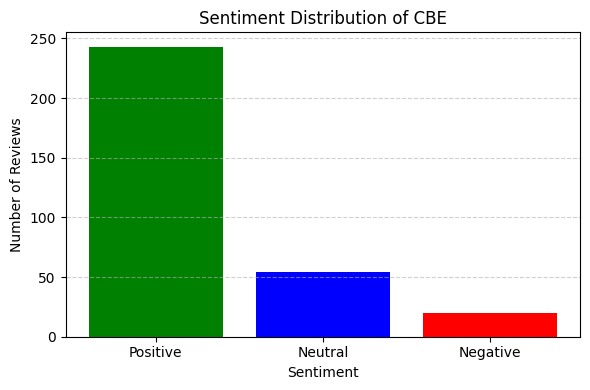

In [19]:
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution of CBE')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()